# Practical 1 $\delta^{18}O$ worksheet
**OPEN THIS NOTEBOOK IN GOOGLE COLAB**


In [3]:
## import modules - don't change this! 
import numpy as np # numpy is the cornerstone of coding in python
import pandas as pd # pandas to work with tables (think excel on steroids)
import xarray as xr # xarray to work with n-dimensional datasets
import cartopy.crs as ccrs # cartopy for map projections
import matplotlib.pyplot as plt # import pyplot from matplotlib for plotting tools

----
## Task 1: d18Ocalcite equation
- name your function `equalibrium_calcite`
- once written, test your function by running the cell below

In [ ]:
#### task 1 solution
def equilibrium_calcite(d18O_sw,T,a,b,c):
    """
    This function calculates equilibrium d18O of calcite from temperature and d18O of seawater.
 
    Parameters:
    d18O_sw (float): d18O of seawater (in ‰ VSMOW).
    T (float): OCean temperature (in ºC)
    a (float): Equation coefficient 1.
    b (float): Equation coefficient 2.
    c (float): Equation coefficient 3.

    Returns:
    float: The predicted d18O of calcite
    """
    d18O_sw_VPDB = d18O_sw-0.27 # subtract 0.27 to convert to VPDB
    
    discriminant = b**2 - 4*c*(a - T) # calculate discriminant
    d18O_calcite = d18O_sw_VPDB + (-b + np.sqrt(discriminant)) / (2 * c)
    return d18O_calcite


In [24]:
### test your function with the following parameters
T = 16.1
d18O_sw = 0.5
a = 16.1
b = -4.64
c = 0.05

equilibrium_calcite(d18O_sw,T,a,b,c)

# you should get an answer of 0.23 per mille

0.22999999999999998

## Task 2.1: Load datasets
Load data from [this study by Charlotte Breitkreuz et al., in 2018](https://doi.org/10.1029/2018JC014300). I accessed the original data [here](https://doi.pangaea.de/10.1594/PANGAEA.889922) and cleaned it up a little to make life easier. You can see exactly what I did in the `data/clean_data.ipynb` file on the github page for this session. The full data reference is:
>Supplement to: Breitkreuz, C et al. (2018): A dynamical reconstruction of the global monthly-mean oxygen isotopic composition of seawater. Journal of Geophysical Research: Oceans, 123(10), 7206-7219, https://doi.org/10.1029/2018JC014300 

The clean data for you to use can be found the the `data/gridded_seawater_data.nc` file. This is a multi-dimensional netcdf file - load it using `xarray`. 

In [4]:
# load gridded ocean data (including d18Osw, temperature, and salinity on a 1x1 latxlon grid)
ocean_data = xr.open_dataset('data/gridded_seawater_data.nc') # load the netcdf file into an xarray dataset
ocean_data # running this cell should output the dataset info, you can click on the variables to get metadata etc.

<xarray.Dataset> Size: 3MB
Dimensions:  (month: 12, depth: 6, lat: 46, lon: 51)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * depth    (depth) float64 48B 25.0 85.0 170.0 290.0 455.0 670.0
  * lat      (lat) float64 368B -35.0 -32.5 -30.0 -27.5 ... 70.0 72.5 75.0 77.5
  * lon      (lon) float64 408B -90.0 -87.5 -85.0 -82.5 ... 27.5 30.0 32.5 35.0
Data variables:
    d18Osw   (month, depth, lat, lon) float64 1MB ...
    T        (month, depth, lat, lon) float64 1MB ...
Attributes:
    description:    gridded climatology from Breitkruez et al., 2018 (https:/...
    regrid_method:  bilinear

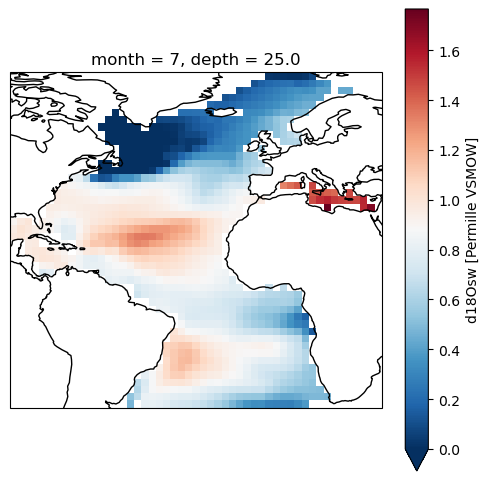

In [25]:
### run this code to check you've loaded the data properly 
# 
## use the .sel syntax to select data from the month of July and the 25m depth level
f = plt.figure(figsize=(6,6)) # initialise an empty figure
ax = f.add_subplot(111,projection=ccrs.PlateCarree())
ocean_data.sel(depth=25,month=7)['d18Osw'].plot(
    vmin=0, # set the minimum color as 0
    cmap='RdBu_r', # use a red and blue colormap
    ax=ax, # use the axis we made above
    transform=ccrs.PlateCarree() # set the map projection to use
)
ax.coastlines() # add coastlines for reference


## Task 2.2: write a function that samples the coean data at a given latitude and longitude


In [31]:
def sample_data(lat,lon,depth,month):
    """
    This function returns the temperature and d18O of seawater at given location (lat,lon) for a given month.
 
    Parameters:
    lat (float): latitude you want to sample (degrees north).
    lon (float): longitude you want to sample (degrees east).
    depth (float): water depth (m)
    month (int): indexer for the month you wants (0=jan,1=feb, etc)

    Returns:
    data_i: an xarray dataset of d18Osw and T at the given location
    """    

    data_i = ocean_data.sel(lat=lat,lon=lon,month=month,depth=depth,method='nearest').squeeze()
    return data_i



In [41]:
## test your function by running this cell with test values:
lat = 50 # 50ºN
lon = -20 # 20ºW
depth = 100 # depth of 100m
month = 6 # month of july (remember, python uses zero-indexing)

sample_data(lat,lon,depth,month)['T'].values

## the value it gives should be 10.15 degrees

array(10.14534923)

----
## Task 3: Foram ecology


Text(0.5, 1.0, 'G. bulloides abundance pattern at 50ºN, 20ºW')

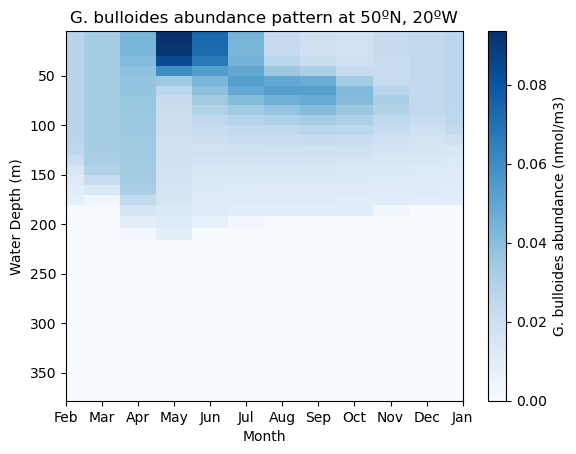

In [62]:
foram_eco = xr.open_dataset('data/plafom_foram_abundance.nc')
foram_eco.sel(lat=50,lon=-20,method='nearest')['GBulloides'].plot(x='month',cmap='Blues',cbar_kwargs={'label':'G. bulloides abundance (nmol/m3)'})
plt.ylabel('Water Depth (m)')
plt.xlabel('Month')
plt.gca().invert_yaxis()
plt.savefig('example_Gbull_abundance.png',transparent=False)
plt.title('G. bulloides abundance pattern at 50ºN, 20ºW')

In [63]:
foram_eco

<xarray.Dataset> Size: 10MB
Dimensions:      (month: 12, depth: 30, lat: 46, lon: 51)
Coordinates:
  * month        (month) <U3 144B 'Feb' 'Mar' 'Apr' 'May' ... 'Nov' 'Dec' 'Jan'
  * depth        (depth) float32 120B 5.0 15.0 25.0 35.0 ... 326.9 351.1 378.2
  * lat          (lat) float64 368B -35.0 -32.5 -30.0 -27.5 ... 72.5 75.0 77.5
  * lon          (lon) float64 408B -90.0 -87.5 -85.0 -82.5 ... 30.0 32.5 35.0
Data variables:
    GRuberW      (month, depth, lat, lon) float32 3MB ...
    GBulloides   (month, depth, lat, lon) float32 3MB ...
    NPachyderma  (month, depth, lat, lon) float32 3MB ...
Attributes:
    description:    Global monthly concentration of the cold-water planktonic...
    regrid_method:  bilinear

foram_eco